In [214]:
import matplotlib.pyplot as plt
import seaborn as sns
import json
import numpy as np
import pandas as pd
from googleapiclient.discovery import build
from config.config import YOUTUBE_API_KEY
from api_methods import fetch_channel_stats, fetch_video_ids, fetch_video_details

In [215]:
# Get credentials and create an API client
api_service_name = "youtube"
api_version = "v3"

youtube = build(api_service_name, api_version, developerKey = YOUTUBE_API_KEY)

In [216]:
# Channels to analyze
channel_ids = [
    "UC6OI7Crv96jgra5pwJNDFRQ", #Channel's name Sezen Aksu
    # Can add more channels
]

In [217]:
channel_stats = fetch_channel_stats(youtube, channel_ids)

In [218]:
channel_stats

,channelName,subscribers,views,totalVideos,playlistId
0,Sezen Aksu,2570000,2826053191,748,UU6OI7Crv96jgra5pwJNDFRQ


In [219]:
#?
channel_stats.loc

In [220]:
playlist_id = channel_stats.loc[channel_stats['channelName']== "Sezen Aksu", "playlistId"].iloc[0]

In [221]:
video_ids = fetch_video_ids(youtube, playlist_id)  # belirli bir çalma listesine ait video id çekme işlemi gerçekleştirilecektir.

In [222]:
video_ids

['SwFG0k9ezHg',
 'EF9NO-fvs3c',
 '_y08PXbalHg',
 '7HNOJisHhbg',
 'EOADibxhQms',
 'nYUb6k9VB_o',
 'MsaGFWTQ9ug',
 'XgXtm59kHTY',
 '-f9r6m_iQRo',
 '6MLwrXvqq4g',
 'mFBa6_FZA6Y',
 '2V4s3QujDVM',
 'muOMSxHW6uU',
 'tA598nLajOc',
 'hC7ye3Iunxs',
 'gInR24wjdEQ',
 'ZaYxJY4BThE',
 'tsXjkU-fY2c',
 'gwhyktn99uo',
 'ANjllSdNlww',
 'vSmxJS0vyS8',
 'xVaKYpxjfs0',
 'R7epdPOyuRE',
 'TwKKGO4bnPI',
 'yjvYFVBSE6I',
 'hppUAi6s-lI',
 'PrreJ_HEy6w',
 'uu8SkX60p6M',
 '5pXs6FjoOFE',
 'ix1TPNvlS3c',
 'x3Ly2HSnE6A',
 'RsfaBzA4bQw',
 'UVADZfalgQk',
 'zCPZjf_MVUk',
 'do-enXeqzRg',
 '83RFuNDB-zA',
 'Pjgk_5Mlb0k',
 'txet741U_bw',
 'Tnf6saLmGy8',
 'NWbb7TR92Tc',
 'kckpSGy5vcA',
 'TbBYUO8zvoM',
 'fjjM9DRwfN8',
 '-Cf4Yiho-tw',
 'bqC65QXi_JE',
 'Wc3xHIJoxF4',
 'LXWPeim0CU4',
 'DWKapv81V4c',
 'N8m-KiJxJoo',
 'PrJULYp6XJc',
 'gi4koQNYrGw',
 'IqkKxPeWBPQ',
 'KzzIZNQ2bmY',
 'eMlIhNIZHio',
 'C6_Gtdi32Ek',
 '2c__lhepTdA',
 'Gx_VRdCgI-c',
 'lf1MnMGWRlQ',
 '6rvEKMwkOYo',
 'pMDjDKfGHxU',
 'iGFRQeb_tiE',
 'd5EpsNDEAac',
 'zNg7Pd

In [223]:
# Kanala ait video sayısı
len(video_ids)

749

# Kanala ait videoların detayları

In [224]:
video_details = fetch_video_details(youtube, video_ids)

In [225]:
video_details.head(n=1)

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,definition,caption
0,SwFG0k9ezHg,Sezen Aksu,Sezen Aksu - Gidiyorum #SezenAksu #MinikSerçe ...,=============================\r\n\r\nSezen Aks...,"[sezen aksu, Turkish music, Turkish Pop Music,...",2023-12-03T17:00:17Z,22324,1343,None,40,PT49S,hd,false


En çok izlenme alan video'ya ait satırı bulmaya çalışalım.

Öncelikle Null değer var mı yok mu kontrol edelim

In [226]:
video_details.isnull().any()

video_id          False
channelTitle      False
title             False
description       False
tags               True
publishedAt       False
viewCount         False
likeCount          True
favouriteCount     True
commentCount      False
duration          False
definition        False
caption           False
dtype: bool

In [227]:
# NaN değerleri 0 sayısı ile doldurma
fill_value = 0
video_details.fillna(fill_value, inplace=True)

In [228]:
# Kontrol edelim 
video_details.isnull().any()

video_id          False
channelTitle      False
title             False
description       False
tags              False
publishedAt       False
viewCount         False
likeCount         False
favouriteCount    False
commentCount      False
duration          False
definition        False
caption           False
dtype: bool

In [229]:
# ? integer a çevirmeye çalış. Kolon tipi değiştirme
video_details.dtypes

video_id          object
channelTitle      object
title             object
description       object
tags              object
publishedAt       object
viewCount         object
likeCount         object
favouriteCount     int64
commentCount      object
duration          object
definition        object
caption           object
dtype: object

Kanal'ın en çok izlenen videolarını inceleyelim.

In [230]:
# En çok izlenen videoya ait satırı bulma
most_viewed = video_details.loc[video_details['viewCount'].astype(float).idxmax()]

# En çok izlenen videoya ait bilgiler
most_viewed_video_info = most_viewed[['video_id','channelTitle', 'title', 'description', 'tags', 'publishedAt',
                                           'viewCount', 'likeCount', 'favouriteCount', 'commentCount',
                                           'duration', 'definition', 'caption']]

# most_viewed_video_info değişkeni artık en çok izlenen videoya ait tüm bilgileri içerir
most_viewed_video_df = pd.DataFrame([most_viewed_video_info])
most_viewed_video_df.head()

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,definition,caption
68,p4yxn8ZahPI,Sezen Aksu,Sezen Aksu - Ben De Yoluma Giderim (Official V...,"""Bu haftaki çalışmamız, fırından çıktıktan son...","[sezen aksu, Turkish music, Turkish Pop Music,...",2020-02-20T20:30:04Z,124556506,646903,0,49329,PT3M44S,hd,true


In [231]:
# 'viewCount' sütununu sayısal veri türüne dönüştür
video_details['viewCount'] = pd.to_numeric(video_details['viewCount'], errors='coerce')

# NaN değerleri temizle
video_details = video_details.dropna(subset=['viewCount'])

# 'viewCount' sütununa göre DataFrame'i sırala ve en çok izlenen 10 videoyu seç
top_10_viewed = video_details.nlargest(10, 'viewCount')

# En çok izlenen 10 videoya ait bilgiler
top_10_viewed_video_info = top_10_viewed[['video_id','channelTitle', 'title', 'description', 'tags', 'publishedAt',
                                           'viewCount', 'likeCount', 'favouriteCount', 'commentCount',
                                           'duration', 'definition', 'caption']]

# top_10_viewed_video_info değişkeni artık en çok izlenen 10 videoya ait tüm bilgileri içerir
top_10_viewed_video_df = pd.DataFrame(top_10_viewed_video_info)
top_10_viewed_video_df.head(5)

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,definition,caption
68,p4yxn8ZahPI,Sezen Aksu,Sezen Aksu - Ben De Yoluma Giderim (Official V...,"""Bu haftaki çalışmamız, fırından çıktıktan son...","[sezen aksu, Turkish music, Turkish Pop Music,...",2020-02-20T20:30:04Z,124556506,646903,0,49329,PT3M44S,hd,true
235,D-i77gTIEWM,Sezen Aksu,Sezen Aksu - İhanetten Geri Kalan (Official Au...,Biraz Pop Biraz Sezen - İhanetten Geri Kalan \...,"[sezen aksu, YENİ ALBÜM, SEZEN AKSU YENİ, SEZE...",2017-01-23T18:45:19Z,85829371,341234,0,17372,PT3M57S,hd,false
318,Eg6gKLXA30U,Sezen Aksu,Sezen Aksu - Tükeneceğiz (Official Audio),Sezen Aksu - Tükeneceğiz\n\nSöz: Sezen Aksu\nB...,"[sezen aksu, sezen aksu tükeneceğiz, tükeneceğ...",2016-12-25T21:23:03Z,73285056,273049,0,14555,PT4M20S,hd,true
213,6ywcf07KQZA,Sezen Aksu,Sezen Aksu - Manifesto (Official Video),"Manifesto (Biraz Pop Biraz Sezen, 2017) \n\n#l...","[sezen aksu, manifesto, sezen aksu manifesto, ...",2017-05-27T08:00:20Z,66711863,337038,0,30937,PT3M31S,hd,true
349,352QSI4nsQk,Sezen Aksu,Sezen Aksu - Kaçın Kurası (Official Audio),Söz: Sezen Aksu\nBeste: Sezen Aksu\nDüzenleme:...,"[sezen aksu, gönül gözüm kapalı bilerek sana y...",2016-12-20T08:09:09Z,65943523,297947,0,17149,PT3M46S,hd,true


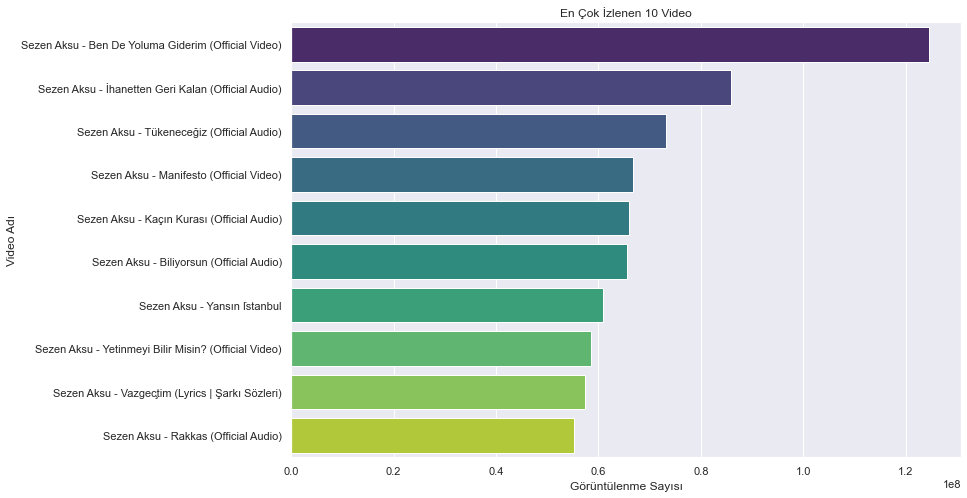

In [243]:
# En çok izlenen 10 videoya ait DataFrame'i kullanarak çubuk grafik oluştur
sns.set(rc={'figure.figsize': (12, 8)})
sns.barplot(x='viewCount', y='title', data=top_10_viewed_video_df, palette='viridis')

# Grafik üzerine eklemeler
plt.xlabel("Görüntülenme Sayısı")
plt.ylabel("Video Adı")
plt.title("En Çok İzlenen 10 Video")
plt.show()

Kanal'ın en çok beğeni alan videoları

In [244]:
most_liked = video_details.loc[video_details['likeCount'].astype(float).idxmax()]

In [245]:
most_liked_video_info = most_liked[['video_id','channelTitle', 'title', 'description', 'tags', 'publishedAt',
                                           'viewCount', 'likeCount', 'favouriteCount', 'commentCount',
                                           'duration', 'definition', 'caption']]

In [247]:
most_liked_video_df = pd.DataFrame([most_liked_video_info])
most_liked_video_df.head()

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,definition,caption
68,p4yxn8ZahPI,Sezen Aksu,Sezen Aksu - Ben De Yoluma Giderim (Official V...,"""Bu haftaki çalışmamız, fırından çıktıktan son...","[sezen aksu, Turkish music, Turkish Pop Music,...",2020-02-20T20:30:04Z,124556506,646903,0,49329,PT3M44S,hd,true


In [248]:
# 'likeCount' sütununu sayısal veri türüne dönüştür
video_details['likeCount'] = pd.to_numeric(video_details['likeCount'], errors='coerce')

# NaN değerleri temizle
video_details = video_details.dropna(subset=['likeCount'])

# 'likeCount' sütununa göre DataFrame'i sırala ve en çok izlenen 10 videoyu seç
top_10_liked = video_details.nlargest(10, 'likeCount')

# En çok beğenilen 10 videoya ait bilgiler
top_10_liked_video_info = top_10_liked[['video_id','channelTitle', 'title', 'description', 'tags', 'publishedAt',
                                           'viewCount', 'likeCount', 'favouriteCount', 'commentCount',
                                           'duration', 'definition', 'caption']]

# top_10_viewed_video_info değişkeni artık en çok beğenilen 10 videoya ait tüm bilgileri içerir
top_10_liked_video_df = pd.DataFrame(top_10_liked_video_info)
top_10_liked_video_df.head(5)

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,definition,caption
68,p4yxn8ZahPI,Sezen Aksu,Sezen Aksu - Ben De Yoluma Giderim (Official V...,"""Bu haftaki çalışmamız, fırından çıktıktan son...","[sezen aksu, Turkish music, Turkish Pop Music,...",2020-02-20T20:30:04Z,124556506,646903,0,49329,PT3M44S,hd,true
69,uVaG7dvT91s,Sezen Aksu,Sezen Aksu - Yetinmeyi Bilir Misin? (Official ...,"""Bu şarkının bestecisi Serkan İzzet Özdoğan. A...","[sezen aksu, Turkish music, Turkish Pop Music,...",2020-01-16T21:00:04Z,58503004,450311,0,19802,PT2M59S,hd,true
235,D-i77gTIEWM,Sezen Aksu,Sezen Aksu - İhanetten Geri Kalan (Official Au...,Biraz Pop Biraz Sezen - İhanetten Geri Kalan \...,"[sezen aksu, YENİ ALBÜM, SEZEN AKSU YENİ, SEZE...",2017-01-23T18:45:19Z,85829371,341234,0,17372,PT3M57S,hd,false
213,6ywcf07KQZA,Sezen Aksu,Sezen Aksu - Manifesto (Official Video),"Manifesto (Biraz Pop Biraz Sezen, 2017) \n\n#l...","[sezen aksu, manifesto, sezen aksu manifesto, ...",2017-05-27T08:00:20Z,66711863,337038,0,30937,PT3M31S,hd,true
247,-aW8x1jTA2U,Sezen Aksu,Sezen Aksu - Biliyorsun (Official Audio),Hayat bazen öyle insafsız ki \nKüçük bir boşlu...,"[sezen aksu, Biliyorsun, Ağlamak Güzeldir, Sez...",2016-12-26T06:29:53Z,65582601,301002,0,12394,PT5M17S,hd,false


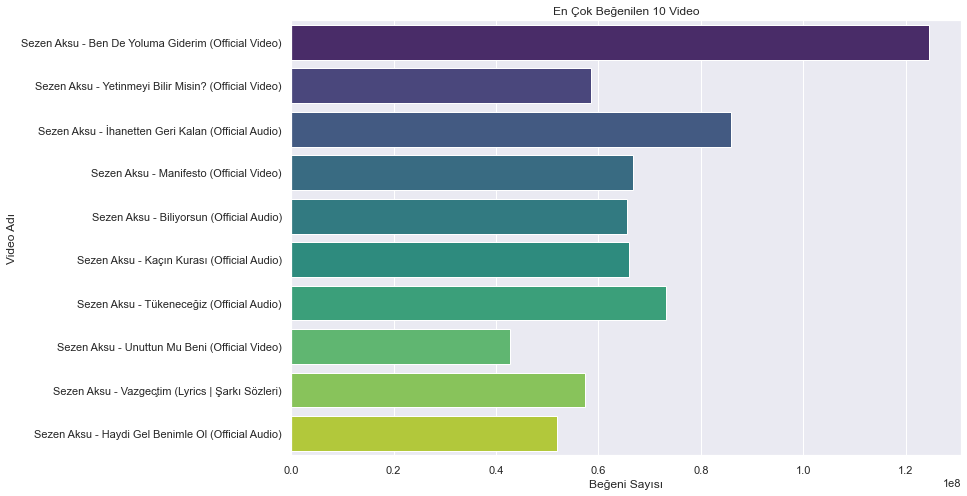

In [249]:
# En çok beğenilen 10 videoya ait DataFrame'i kullanarak çubuk grafik oluştur
sns.set(rc={'figure.figsize': (12, 8)})
sns.barplot(x='viewCount', y='title', data=top_10_liked_video_df, palette='viridis')

# Grafik üzerine eklemeler
plt.xlabel("Beğeni Sayısı")
plt.ylabel("Video Adı")
plt.title("En Çok Beğenilen 10 Video")
plt.show()

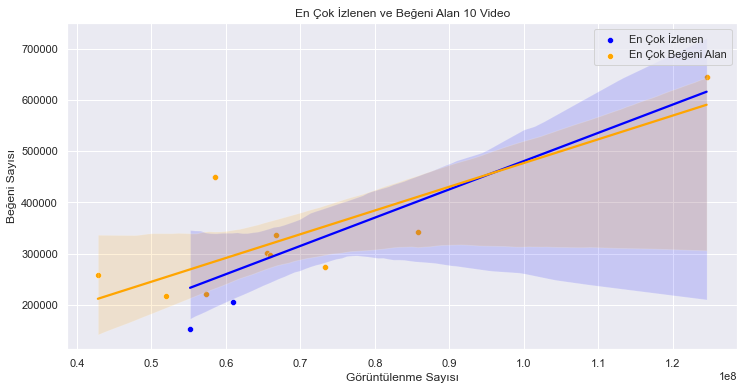

In [250]:
import seaborn as sns
import matplotlib.pyplot as plt

# En çok beğeni alan ve en çok izlenen 10 videoyu seç
top_10_likes = video_details.nlargest(10, 'likeCount')
top_10_views = video_details.nlargest(10, 'viewCount')

# Çift yönlü scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x='viewCount', y='likeCount', data=top_10_views, color='blue', label='En Çok İzlenen')
sns.scatterplot(x='viewCount', y='likeCount', data=top_10_likes, color='orange', label='En Çok Beğeni Alan')

# Regresyon çizgisi ekle
sns.regplot(x='viewCount', y='likeCount', data=top_10_views, scatter=False, color='blue')
sns.regplot(x='viewCount', y='likeCount', data=top_10_likes, scatter=False, color='orange')

# Grafik üzerine eklemeler
plt.xlabel('Görüntülenme Sayısı')
plt.ylabel('Beğeni Sayısı')
plt.title('En Çok İzlenen ve Beğeni Alan 10 Video')
plt.legend()
plt.show()

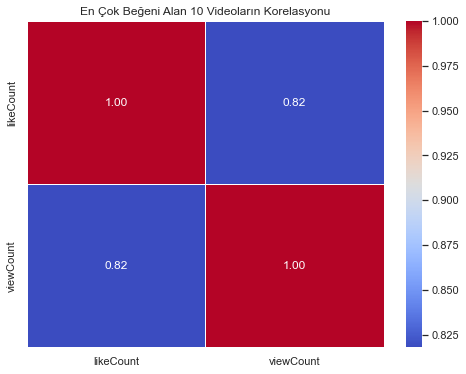

In [251]:
import seaborn as sns
import matplotlib.pyplot as plt

# En çok beğeni alan ve en çok izlenen 10 videoyu seç
top_10_likes = video_details.nlargest(10, 'likeCount')
top_10_views = video_details.nlargest(10, 'viewCount')

# Seçilen videoların 'likeCount' ve 'viewCount' değişkenleri arasındaki korelasyonu hesapla
correlation_matrix_likes = top_10_likes[['likeCount', 'viewCount']].corr()

# Seçilen videoların 'likeCount' ve 'viewCount' değişkenleri arasındaki korelasyonu ısı haritası ile görselleştir
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_likes, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('En Çok Beğeni Alan 10 Videoların Korelasyonu')
plt.show()

Beğeni sayısı ve izlenme sayısı arasında güçlü bir ilişki olduğunu gösterir.

In [233]:
# En çok izlenen videoya ait ID'yi liste içine eklemek
most_viewed_video_id = most_viewed['video_id']

# most_viewed_video_id artık en çok izlenen videoya ait ID'yi içeren bir pandas Serisi
print(most_viewed_video_id)

p4yxn8ZahPI


In [242]:
# Video istatistiklerini almak için API isteği oluşturalım.
request = youtube.videos().list(
    part="snippet,statistics",
    id= most_viewed_video_id
)
response = request.execute()

# JSON formatında çıktıyı yazdıralım.
print(json.dumps(response, indent=2))

{
  "kind": "youtube#videoListResponse",
  "etag": "DFAfFOmdSd9Rmo8S29kS146FiOo",
  "items": [
    {
      "kind": "youtube#video",
      "etag": "Ep6Ilti67bbBmgUwIaU-gZnuhkM",
      "id": "p4yxn8ZahPI",
      "snippet": {
        "publishedAt": "2020-02-20T20:30:04Z",
        "channelId": "UC6OI7Crv96jgra5pwJNDFRQ",
        "title": "Sezen Aksu - Ben De Yoluma Giderim (Official Video)",
        "description": "\"Bu haftaki \u00e7al\u0131\u015fmam\u0131z, f\u0131r\u0131ndan \u00e7\u0131kt\u0131ktan sonra biraz bekletilmi\u015f yeni bir \u015fark\u0131.  \u015e\u00f6yle ki; \u015fark\u0131y\u0131 size teslim ediyorum. \u00d6zellikle de \u00e7almaya, s\u00f6ylemeye hevesli olanlar i\u00e7in d\u00fc\u015f\u00fcnd\u00fcm bunu. Notas\u0131 ve armonilerine a\u015fa\u011f\u0131daki linkten ula\u015fabilirsiniz. Buyurun size cover yerine, s\u0131f\u0131r \u015fark\u0131!\n\nKompozisyon Erman Arda\u2019n\u0131n. Fikir vermesi a\u00e7\u0131s\u0131ndan biraz daha d\u00fczenlemeye evrilmi\u015f ol

In [235]:
video_info = response['items'][0]
title = video_info['snippet']['title']
published_at = video_info['snippet']['publishedAt']
view_count = video_info['statistics']['viewCount']
like_count = video_info['statistics']['likeCount']
favorite_count = video_info['statistics']['favoriteCount']
comment_count = video_info['statistics']['commentCount']

# Verileri DataFrame'e çevirme
data = {
    "Video Adı": [title],
    "Yayın Tarihi": [published_at],
    "Görüntülenme Sayısı": [view_count],
    "Beğeni Sayısı": [like_count],
    "Favorilere Ekleme Sayısı": [favorite_count],
    "Yorum Sayısı": [comment_count]
}

video_df = pd.DataFrame(data)

In [236]:
video_df.head()

,Video Adı,Yayın Tarihi,Görüntülenme Sayısı,Beğeni Sayısı,Favorilere Ekleme Sayısı,Yorum Sayısı
0,Sezen Aksu - Ben De Yoluma Giderim (Official V...,2020-02-20T20:30:04Z,124556506,646903,0,49329


# Video hakkında yapılan yorumları inceliyoruz.

In [237]:
request = youtube.commentThreads().list(
    part='snippet',
    videoId= most_viewed_video_id,
    maxResults=100  # maximum 100 yorum alabiliyoruz
)
response = request.execute()

In [238]:
response

{'kind': 'youtube#commentThreadListResponse',
 'etag': '9OPx0rfiulR96VqHmFwFFM8v-7s',
 'nextPageToken': 'Z2V0X25ld2VzdF9maXJzdC0tQ2dnSWdBUVZGN2ZST0JJRkNJY2dHQUFTQlFpSUlCZ0FFZ1VJaVNBWUFCSUZDSjBnR0FFU0JRaWVJQmdBR0FBaURRb0xDSlQ2NUtrR0VJakR1d1U=',
 'pageInfo': {'totalResults': 100, 'resultsPerPage': 100},
 'items': [{'kind': 'youtube#commentThread',
   'etag': 'ZhYi4pdIR0YzAwHyF6lYMCEWZuk',
   'id': 'UgxOkC5F9EsXGvPt09V4AaABAg',
   'snippet': {'channelId': 'UC6OI7Crv96jgra5pwJNDFRQ',
    'videoId': 'p4yxn8ZahPI',
    'topLevelComment': {'kind': 'youtube#comment',
     'etag': '5xTe6qbqKWYQAwyqpgkbKa2MEfY',
     'id': 'UgxOkC5F9EsXGvPt09V4AaABAg',
     'snippet': {'channelId': 'UC6OI7Crv96jgra5pwJNDFRQ',
      'videoId': 'p4yxn8ZahPI',
      'textDisplay': 'Ezdirmem kendimii',
      'textOriginal': 'Ezdirmem kendimii',
      'authorDisplayName': '@Dilevinkaya',
      'authorProfileImageUrl': 'https://yt3.ggpht.com/wh_DoxuGAjGSjvNz24IMLAdwcCykF8gqdGJJklRCRoPtPoD5ManYtUmVJn2KBQBZaWxadS3-=s48-

In [239]:
request = youtube.commentThreads().list(
    part='snippet',
    videoId= most_viewed_video_id,
    maxResults=100  # maximum 100 yorum alabiliyoruz
)
response = request.execute()

comment = [item['snippet']['topLevelComment']['snippet']['textDisplay'] for item in response['items']]
for item in comment:
    print(item)

Ezdirmem kendimii
Bence hayatan daha çok insanlar üzüyorlar 😔😔
Insanlarin agzindan cikan sozlerine inanmayin ! Çünkü  o sozlerin yalan oldugunu birgun kanitlarlar size , hemde en aci halde. ( sende şerefsizlik lakabini kendine takip gittin. Umarim beter olursun mehso / ederinle kal şarkinla birlikte 👋bY
Vay be erkeklerin yorumlarına bakıyorum da kadinlardan daha aci cekmis bende bir erkek icin oturup ağlıyorum asla degmezmis bugun 15 gun sonra mesaj attim bir bahaneyle bana kimsiniz dedi 😔 vay bee sen otur agla adam mesajima kimsiniz desin 😢😢 bu adalet miiiiiii
Boşluktayım... paramparça..
Anladım ki sonu yok yalnızlığın<br>Ben bu dünya da acılar için varım<br>Bazı kullara keder kader olurmuş<br>Ne yazık ki ben de onlar arasındayım<br><br>Gözüm kaydı aydınlığa bir an<br>Aklım kaldı orda daha da çıkamam<br>Bazı kullarını terkeder tanrı acımadan<br>Hiçbir sevapla da kurtarılamayan<br><br>Yok bırakıp gidemezsin<br>Yok olmaz beni bunla itham edemezsin<br>Sen merhametin adı değil misin<br>Be

In [240]:
from googletrans import Translator

def ceviri_getir(ifade):
    try:
        translator = Translator()
        translation = translator.translate(ifade, dest="en")
        return translation.text if translation else None
    except Exception as e:
        print(f"Hata oluştu: {str(e)}")
        return None

In [241]:
ceviri_getir('neredesin')

'Where are you'